# Data Science Capstone Two Project: Ecommerce Fraud Data

## Part IV. Data Modeling



In [1]:
#Import python libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime



In [2]:
#Load the Data 

datapath = '../data/summary_data_processed.csv'

df = pd.read_csv(datapath, index_col=0)

df


,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,...,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,dawn05@tucker-brown.com,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
815,dawn05@tucker-brown.com,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
816,dawn05@tucker-brown.com,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
817,dawn05@tucker-brown.com,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='State', ylabel='No_Orders'>

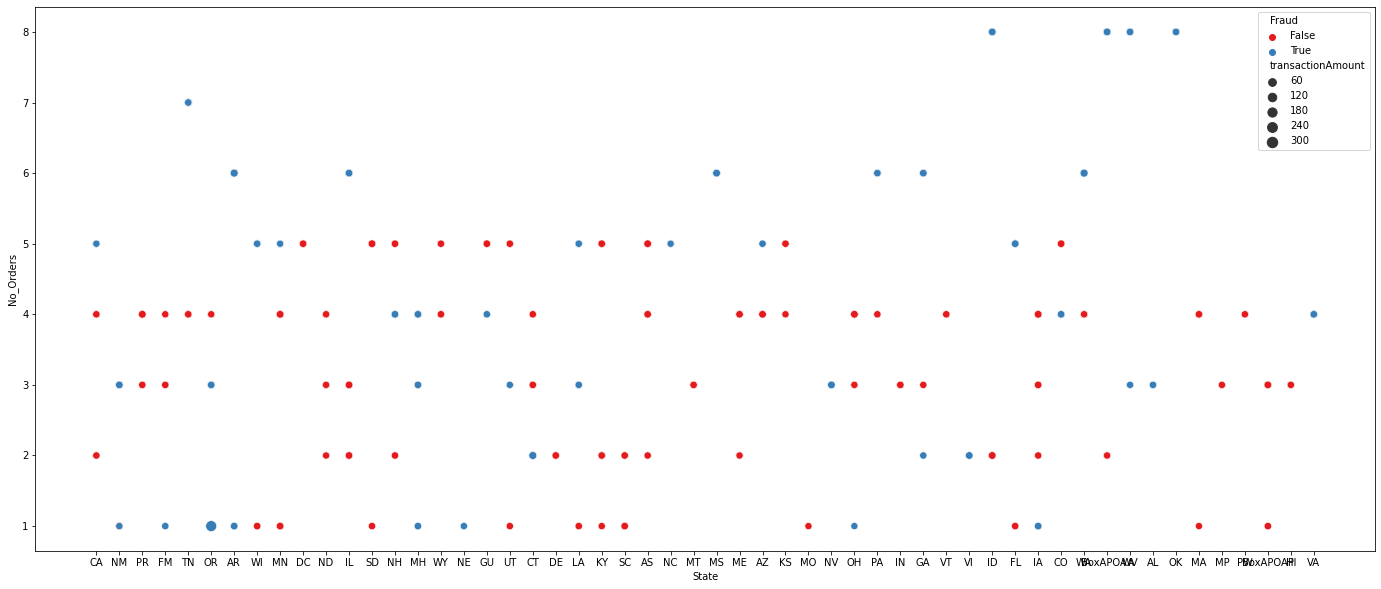

In [3]:
#Create a seaborn scatterplot by calling `sns.scatterplot`
#Specify the dataframe df as the source of the data,
#specify 'Payments Types' for x and 'Payment No' for y,
#specify 'Amount' for the pointsize (scatterplot's `size` argument),
#specify 'Fraud' for `hue`

x = df['State']

y = df['No_Orders']

plt.subplots(figsize=(24, 10))

sns.color_palette("icefire", as_cmap=True)

sns.scatterplot(x='State', y='No_Orders', size= 'transactionAmount', sizes=(50,120), hue='Fraud', palette="Set1",color=".6", data=df)


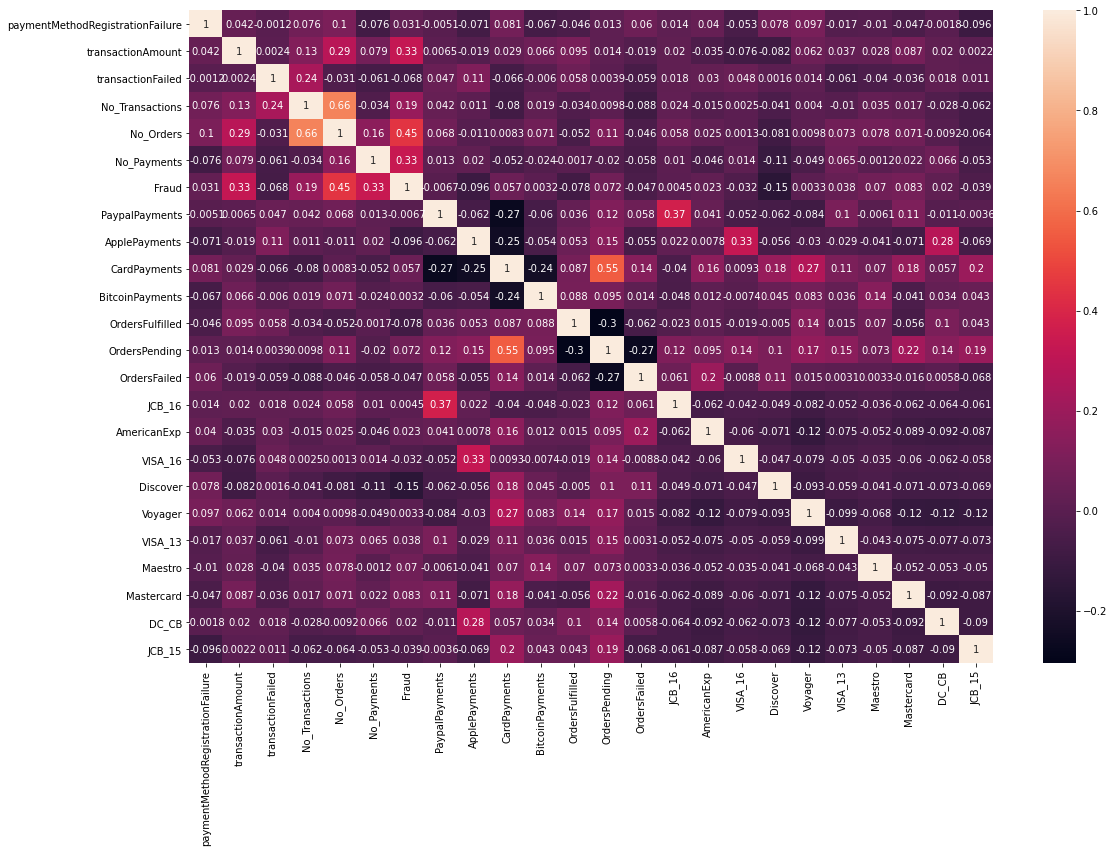

In [4]:
#Show a seaborn heatmap of correlations 

plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(),annot = True);

In [5]:
#Use a list comprehension to build a list of features from the columns of `df` 

features = [feature for feature in df.columns if feature not in [ 'customerEmail', 'transactionId', 'orderId', 'paymentMethodId', 'paymentMethodRegistrationFailure', 'paymentMethodType', 'paymentMethodProvider', 'transactionAmount', 'transactionFailed', 'orderState', 'customerPhone', 'customerDevice', 'customerIPAddress', 'customerBillingAddress', 'No_Transactions', 'No_Orders', 'No_Payments', 'Fraud', 'State']]
print(features)

['PaypalPayments', 'ApplePayments', 'CardPayments', 'BitcoinPayments', 'OrdersFulfilled', 'OrdersPending', 'OrdersFailed', 'JCB_16', 'AmericanExp', 'VISA_16', 'Discover', 'Voyager', 'VISA_13', 'Maestro', 'Mastercard', 'DC_CB', 'JCB_15']


<AxesSubplot:xlabel='No_Transactions', ylabel='transactionFailed'>

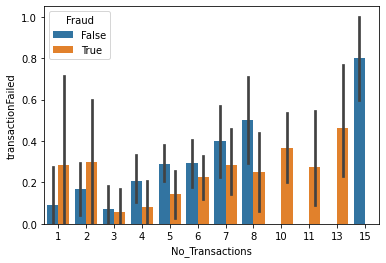

In [6]:
#Show a seaborn bar plot of failed transactions over total transactions 

sns.barplot(x = df['No_Transactions'],y = df['transactionFailed'],hue = df['Fraud'])



In [12]:
#Set X, y variables for analysis
X = df.drop(['customerEmail','transactionId','orderId','paymentMethodId','paymentMethodType','paymentMethodProvider','orderState','customerPhone', 'customerDevice', 'customerIPAddress','customerBillingAddress','Fraud','State'], axis=1)
y = df['Fraud']

In [79]:
from sklearn.model_selection import train_test_split

#Splitting the data into training and testing set.

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.3, 
                                                    random_state=47)


0.73
              precision    recall  f1-score   support

       False       0.73      0.87      0.80       111
        True       0.74      0.53      0.62        76

    accuracy                           0.73       187
   macro avg       0.74      0.70      0.71       187
weighted avg       0.73      0.73      0.72       187



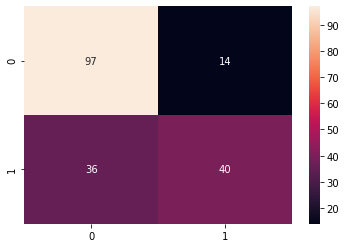

In [89]:
#Logistic Regression Base Model

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

pipe = make_pipeline(StandardScaler(), LogisticRegression())

pipe.fit(X_train, y_train)  # apply scaling on training data

pipeline = Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

reg_pred = pipe.predict(X_test)

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

print(round(accuracy_score(y_test,reg_pred),2))
     
sns.heatmap(data=confusion_matrix(y_test,reg_pred),annot = True)

print(classification_report(y_test,reg_pred))

In [108]:
#Model Tunning. Applying Random Search Cross Validation in Scikit-Learn for Logistic Regression.

from sklearn.model_selection import RandomizedSearchCV

log_param_grid = {'C': [0.01, 0.1, 1, 10, 100] }

tuned_log = GridSearchCV(LogisticRegression(), log_param_grid, refit=True,verbose=3)

scaler = preprocessing.StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
           
tuned_log.fit(X_scaled,y_train)

print(
      "Best parameters: ", tuned_log.best_params_,
      "Best estimator: ", tuned_log.best_estimator_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .........................................C=0.01; total time=   0.0s
[CV 2/5] END .........................................C=0.01; total time=   0.0s
[CV 3/5] END .........................................C=0.01; total time=   0.0s
[CV 4/5] END .........................................C=0.01; total time=   0.0s
[CV 5/5] END .........................................C=0.01; total time=   0.0s
[CV 1/5] END ..........................................C=0.1; total time=   0.0s
[CV 2/5] END ..........................................C=0.1; total time=   0.0s
[CV 3/5] END ..........................................C=0.1; total time=   0.1s
[CV 4/5] END ..........................................C=0.1; total time=   0.0s
[CV 5/5] END ..........................................C=0.1; total time=   0.0s
[CV 1/5] END ............................................C=1; total time=   0.0s
[CV 2/5] END ....................................

0.7486631016042781
              precision    recall  f1-score   support

       False       0.72      0.95      0.82       111
        True       0.85      0.46      0.60        76

    accuracy                           0.75       187
   macro avg       0.79      0.70      0.71       187
weighted avg       0.77      0.75      0.73       187

Base Logistic Model peformance is: 0.73
Tuned Logistic Model peformance is: 0.75


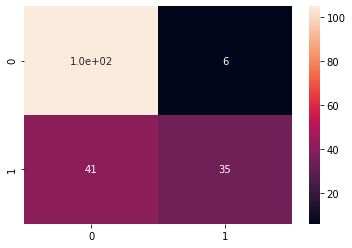

In [111]:
scaler = preprocessing.StandardScaler().fit(X_test)

X_test = scaler.transform(X_test)

tuned_log_predictions = tuned_log.predict(X_test)

print(accuracy_score(y_test,tuned_log_predictions))

sns.heatmap(data = confusion_matrix(y_test, tuned_log_predictions), annot = True)

print(classification_report(y_test, tuned_log_predictions))

print("Base Logistic Model peformance is:", round(accuracy_score(y_test, reg_pred), 2))

print("Tuned Logistic Model peformance is:", round(accuracy_score(y_test, tuned_log_predictions), 2))


0.86
              precision    recall  f1-score   support

       False       0.84      0.93      0.88       111
        True       0.88      0.75      0.81        76

    accuracy                           0.86       187
   macro avg       0.86      0.84      0.85       187
weighted avg       0.86      0.86      0.85       187



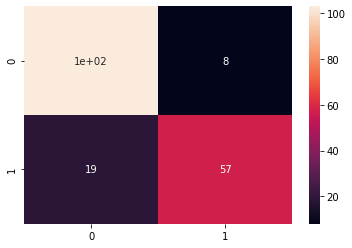

In [60]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier

base_rf_model = RandomForestClassifier(n_estimators=20)

base_rf_model.fit(X_train,y_train)

base_rf_model_pred = base_rf_model.predict(X_test)

print(round(accuracy_score(y_test,base_rf_model_pred), 2))

sns.heatmap(data = confusion_matrix(y_test,base_rf_model_pred),annot = True)

print(classification_report(y_test,base_rf_model_pred))


In [40]:
# Hyperparameter tunning
# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 55, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


{'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 6, 11, 17, 22, 28, 33, 38, 44, 49, 55, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [63]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

RC = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

RG_random = RandomizedSearchCV(estimator = RG, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model

RG_random.fit(X_train, y_train)

print(RG_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 106, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 49, 'bootstrap': True}


              precision    recall  f1-score   support

       False       0.83      0.94      0.88       111
        True       0.89      0.72      0.80        76

    accuracy                           0.85       187
   macro avg       0.86      0.83      0.84       187
weighted avg       0.85      0.85      0.85       187

Base Model peformance is: 0.86
Tuned Model peformance is: 0.85


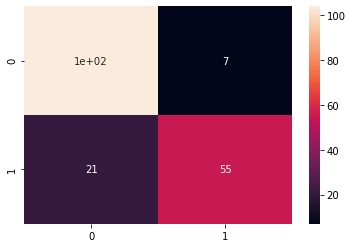

In [69]:
#Random Forest Classifier

tuned_rf_model = RandomForestClassifier(n_estimators=106, max_features='auto', max_depth= 49, min_samples_split= 2, min_samples_leaf=1,bootstrap=True)

tuned_rf_model.fit(X_train,y_train)

tuned_rf_model_pred = tuned_rf_model.predict(X_test)

sns.heatmap(data = confusion_matrix(y_test,tuned_rf_model_pred),annot = True)

print(classification_report(y_test, tuned_rf_model_pred))

print("Base Model peformance is:", round(accuracy_score(y_test, base_rf_model_pred), 2))

print("Tuned Model peformance is:", round(accuracy_score(y_test, tuned_rf_model_pred), 2))



0.4385026737967914
              precision    recall  f1-score   support

       False       0.88      0.06      0.12       111
        True       0.42      0.99      0.59        76

    accuracy                           0.44       187
   macro avg       0.65      0.52      0.35       187
weighted avg       0.69      0.44      0.31       187



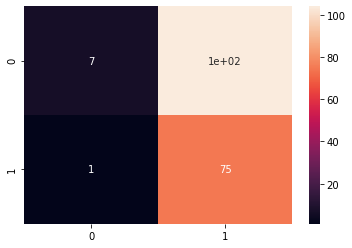

In [116]:
#Support Vector Machine Model Evaluation
from sklearn.svm import SVC

pipe = make_pipeline(StandardScaler(), SVC())

pipe.fit(X_train, y_train)  # apply scaling on training data

pipeline = Pipeline(steps=[('standardscaler', StandardScaler()),
                ('supportvectormachine', SVC())])

svc_pred = pipe.predict(X_test)

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

print(accuracy_score(y_test,svc_pred))

sns.heatmap(data = confusion_matrix(y_test,svc_pred),annot = True)

print(classification_report(y_test, svc_pred))